In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# HEART FAILURE CLINICAL ANALYSIS AND MACHINE LEARNING CRIATION

**Please check below how the project is distributed:**

***1 - Basic analysis, check null values and formatting of data.***

***2 - Verificating the correlation and variables groups (graphs).*** 

***3 - Creating the machine learning model to predict heart failure.***

**This notebook was made to simple data analysis and testing types of machine learning, considerer give an upvote if this code helped you to understand.**

![](http://i.pinimg.com/736x/4f/1c/f4/4f1cf4340de0c95f0d088340dfeb8e33.jpg)

# Basic analysis, check null values and formatting of data

In [2]:
# Importing the heart failure dataset
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [3]:
# Checking what types of data are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Check how many duplicate values there are in the dataset
df.duplicated().sum()

0

In [5]:
#Check how many null values there are in the dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
Number_of_deaths = df.groupby('DEATH_EVENT').size()
Number_of_deaths

DEATH_EVENT
0    203
1     96
dtype: int64

In [7]:
# Transforming the float type into int in the age column
df['age'] = df['age'].astype(int)

# Verificating the correlation and variables groups (graphs)

Text(0, 0.5, 'Age')

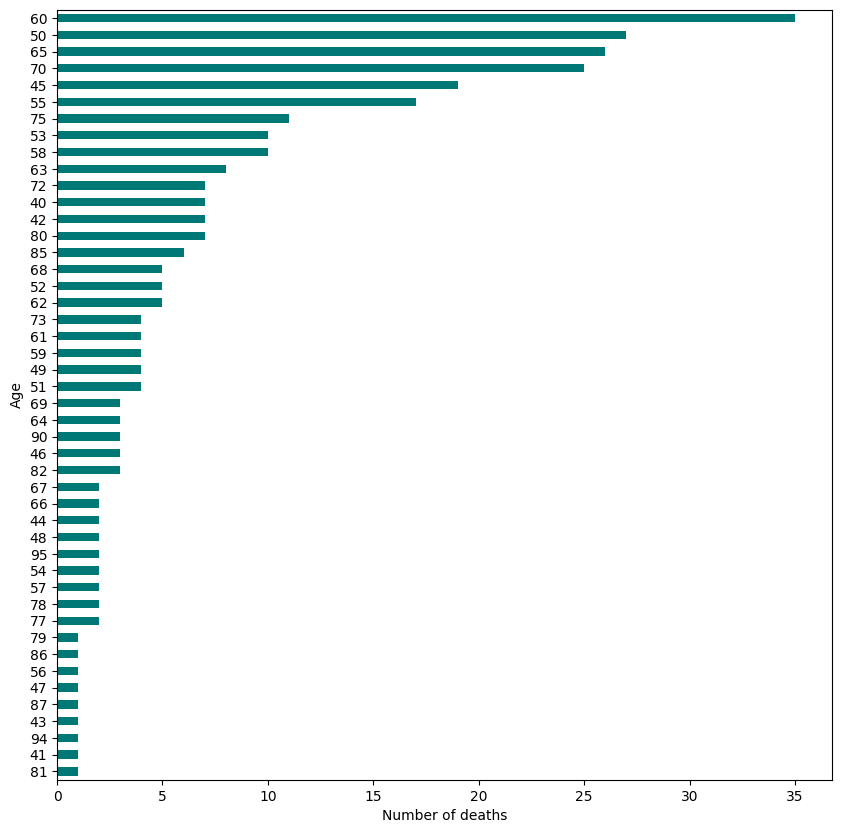

In [8]:
# Checking the number of deaths by age
plt.figure(figsize = (10,10))
groupby = df.groupby('age')['DEATH_EVENT'].count().sort_values(ascending = True)
groupby.plot(kind = 'barh', color = '#007976')
plt.xlabel('Number of deaths')
plt.ylabel('Age')

<Axes: >

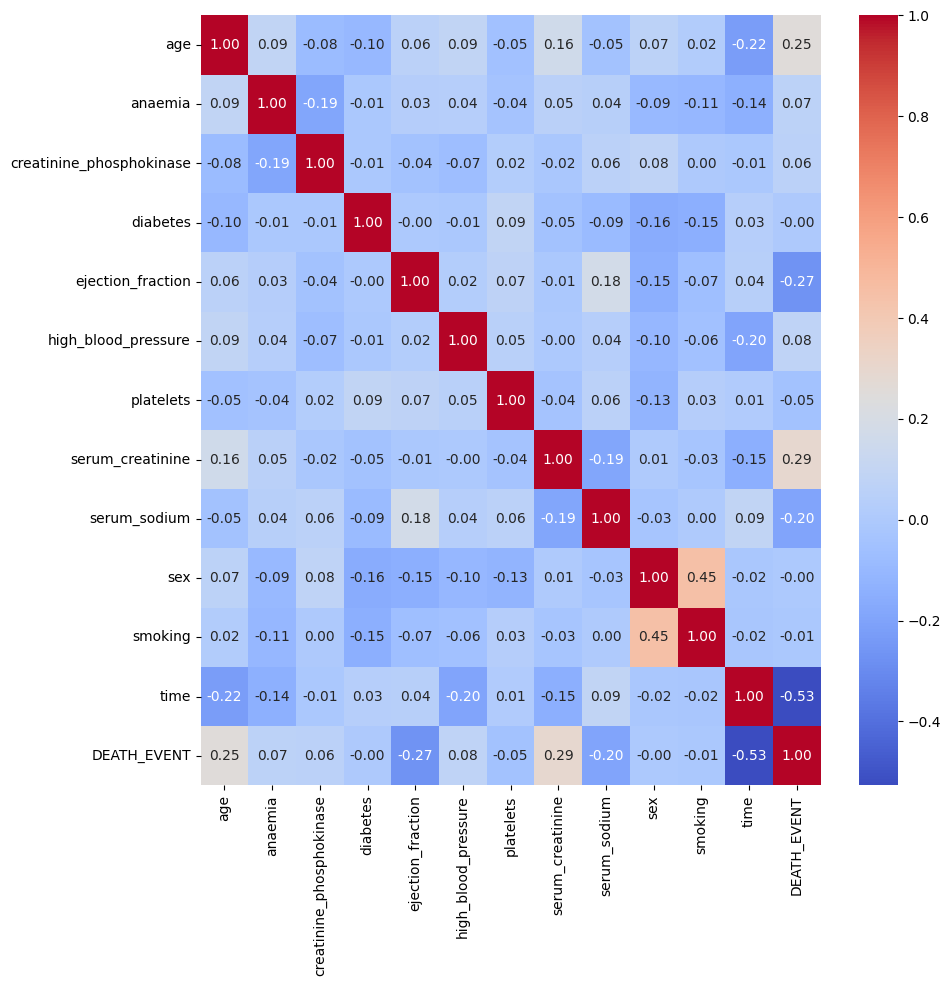

In [9]:
# Checking data correlation
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', fmt = '.2f', annot = True)

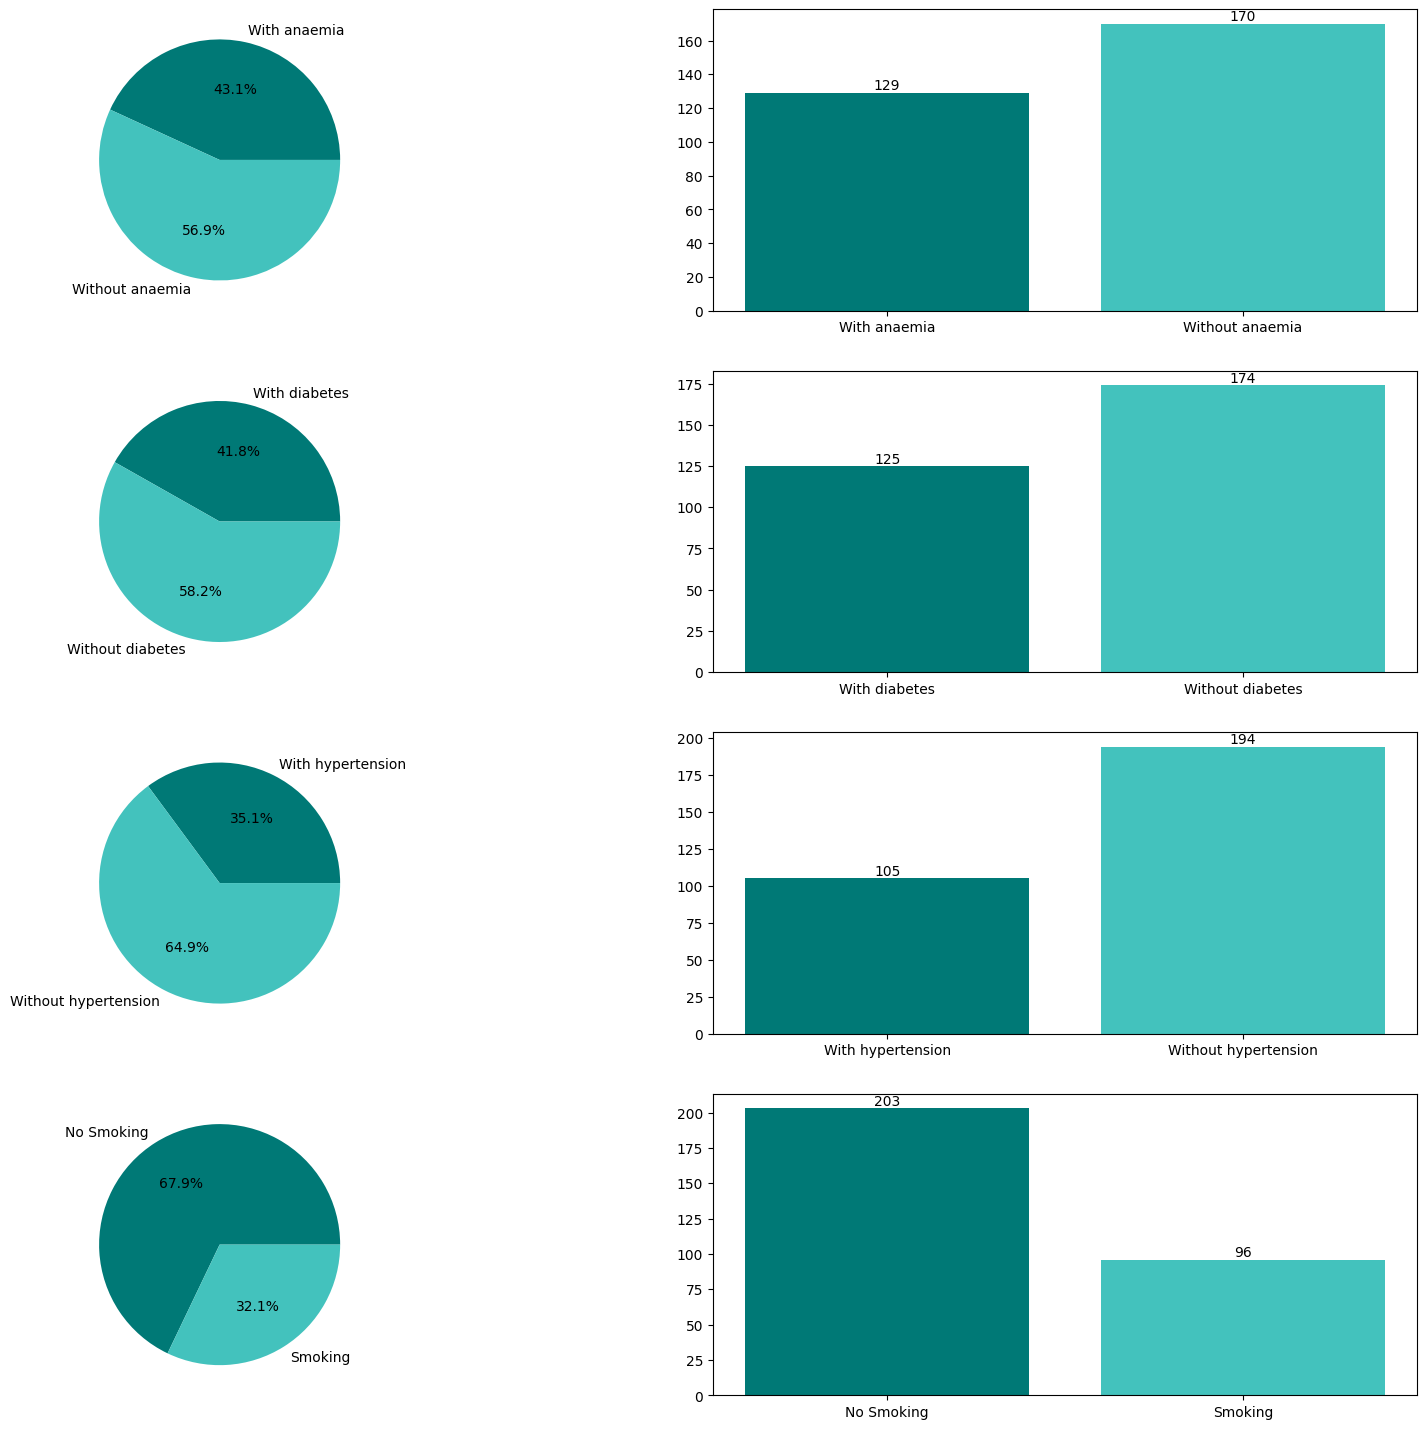

In [10]:
# Creating the analysis columns
# Checking the number of deaths or living that present a disease
df['anaemia_analysis'] = df['anaemia'].apply(lambda x: 'With anaemia' if x == 1 else 'Without anaemia')
df['diabetes_analysis'] = df['diabetes'].apply(lambda x: 'With diabetes' if x == 1 else 'Without diabetes')
df['high_blood_pressure_analysis'] = df['high_blood_pressure'].apply(lambda x: 'With hypertension' if x == 1 else 'Without hypertension')
df['smoking_analysis'] = df['smoking'].apply(lambda x: 'Smoking' if x == 1 else 'No Smoking')

condicoes = ['anaemia_analysis','diabetes_analysis','high_blood_pressure_analysis','smoking_analysis']
condicoes_labels = ['Anaemia', 'Diabetes','Hypertension',' Smoking']

fig, axs = plt.subplots(4, 2, figsize = (20, 18))

for i, cond in enumerate(condicoes):
    agrupamento = df.groupby(cond)['DEATH_EVENT'].count()

    axs[i, 0].pie(agrupamento, labels = agrupamento.index, autopct = '%1.1f%%', colors = ['#007976','#43c2bd'])
    bars = axs[i, 1].bar(agrupamento.index, agrupamento, color = ['#007976','#43c2bd'])

    for bar in bars:
        yval = bar.get_height()
        axs[i, 1].text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(int(yval)), ha='center', va='bottom')

Text(0.5, 1.0, 'Serum Sodium')

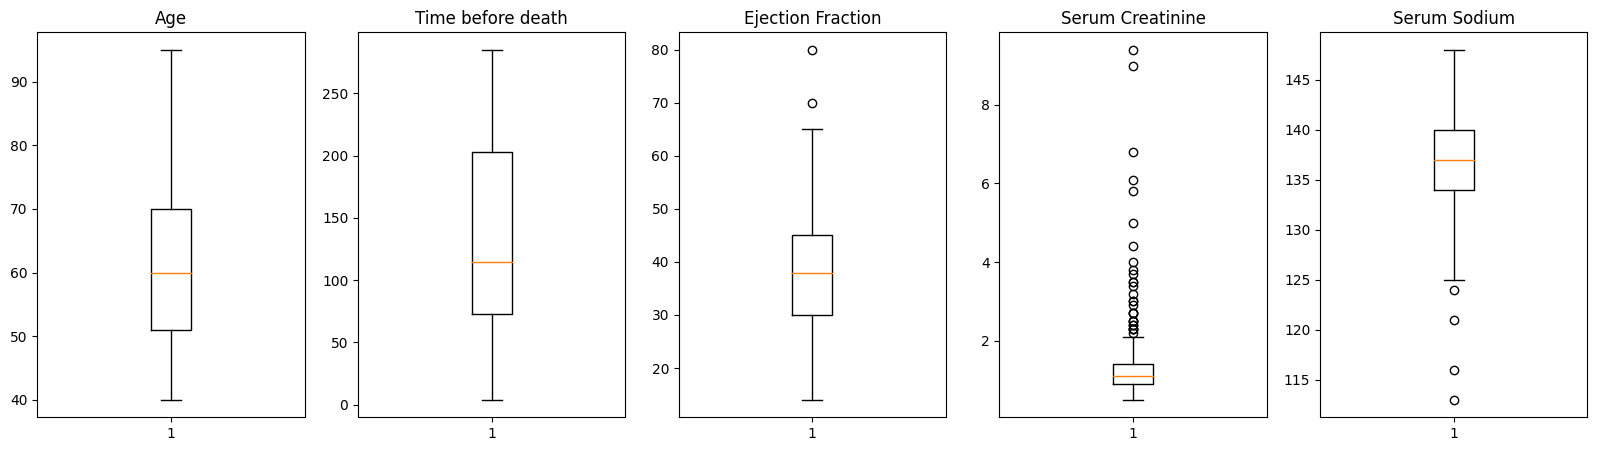

In [11]:
# Checking the boxplot graphs of the values ​​that will be used in the model
fig, axs = plt.subplots(1, 5, figsize = (20,5))
axs[0].boxplot(df['age'])
axs[0].set_title('Age')
axs[1].boxplot(df['time'])
axs[1].set_title('Time before death')
axs[2].boxplot(df['ejection_fraction'])
axs[2].set_title('Ejection Fraction')
axs[3].boxplot(df['serum_creatinine'])
axs[3].set_title('Serum Creatinine')
axs[4].boxplot(df['serum_sodium'])
axs[4].set_title('Serum Sodium')

In [12]:
# Removing previously created columns to facilitate model creation
df.drop(['anaemia_analysis','diabetes_analysis','high_blood_pressure_analysis','smoking_analysis'], axis = 1, inplace = True)

# Creating the machine learning model to predict heart failure

In [13]:
# Separating the independent variables (X) and the dependent variable (y)
X = df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','DEATH_EVENT'], axis = 1)
X = X.values
y = df.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [14]:
# Importing the libraries that will be used to validate the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
# Separating training and test variables (0.34 of test and 0.66 of train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 42)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic_regression_model = LogisticRegression(solver = 'newton-cholesky')
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(solver='newton-cholesky')

In [18]:
y_pred_logistic_regression_model = logistic_regression_model.predict(X_test)

In [19]:
print(f"R2: {logistic_regression_model.score(X_test, y_test)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_logistic_regression_model)}")
print(f"Mean absolute error: {mean_squared_error(y_test, y_pred_logistic_regression_model)}")
print(f"F1 score: {f1_score(y_test, y_pred_logistic_regression_model)}")
print(f"Roc auc score: {roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:,1])}")

R2: 0.8137254901960784
Mean squared error: 0.18627450980392157
Mean absolute error: 0.18627450980392157
F1 score: 0.7466666666666666
Roc auc score: 0.8734326018808778


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_linear_regression_model = linear_regression_model.predict(X_test)

In [23]:
print(f"R2: {linear_regression_model.score(X_test, y_test)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_linear_regression_model)}")
print(f"Mean absolute error: {mean_squared_error(y_test, y_pred_linear_regression_model)}")

R2: 0.3142342825709208
Mean squared error: 0.1682116600229729
Mean absolute error: 0.1682116600229729


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
decision_tree_classifier_model = DecisionTreeClassifier(max_depth = 2, random_state = 21)
decision_tree_classifier_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=21)

In [26]:
y_pred_decision_tree_classifier_model= decision_tree_classifier_model.predict(X_test)

In [27]:
print(f"R2: {decision_tree_classifier_model.score(X_test, y_test)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_decision_tree_classifier_model)}")
print(f"Mean absolute error: {mean_squared_error(y_test, y_pred_decision_tree_classifier_model)}")
print(f"F1 score: {f1_score(y_test, y_pred_decision_tree_classifier_model)}")
print(f"Roc auc score: {roc_auc_score(y_test, decision_tree_classifier_model.predict_proba(X_test)[:,1])}")

R2: 0.7745098039215687
Mean squared error: 0.22549019607843138
Mean absolute error: 0.22549019607843138
F1 score: 0.7160493827160493
Roc auc score: 0.7811520376175548


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
y_pred_knn_model = knn_model.predict(X_test)

In [31]:
print(f"R2: {knn_model.score(X_test, y_test)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_knn_model)}")
print(f"Mean absolute error: {mean_squared_error(y_test, y_pred_knn_model)}")
print(f"F1 score: {f1_score(y_test, y_pred_knn_model)}")
print(f"Roc auc score: {roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])}")

R2: 0.7254901960784313
Mean squared error: 0.27450980392156865
Mean absolute error: 0.27450980392156865
F1 score: 0.5757575757575758
Roc auc score: 0.863244514106583


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gradient_model = GradientBoostingClassifier(n_estimators=6, learning_rate=1,
    max_depth=1, random_state=50)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=6,
                           random_state=50)

In [34]:
y_pred_gradient_model = gradient_model.predict(X_test)

In [35]:
print(f"R2: {gradient_model.score(X_test, y_test)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_gradient_model)}")
print(f"Mean absolute error: {mean_squared_error(y_test, y_pred_gradient_model)}")
print(f"F1 score: {f1_score(y_test, y_pred_gradient_model)}")
print(f"Roc auc score: {roc_auc_score(y_test, gradient_model.predict_proba(X_test)[:,1])}")

R2: 0.8137254901960784
Mean squared error: 0.18627450980392157
Mean absolute error: 0.18627450980392157
F1 score: 0.7710843373493976
Roc auc score: 0.8630485893416928


**The model that presented better metrics in error and F1 score tests was GradientBoostingClassifier, it could improve with other parameters, but this analysis will not delve deeper into this subject. Finally, the dataset is very good for learning how to create graphs and how the variables relate to each other, I recommend it for beginners. If you have any topics you would like to add, feel free to comment.**